## Initial Setups 

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.metrics import *

In [136]:
#Outlier detection using Tukey's method
from scipy.stats import iqr
def outlier_detector(df, colname = 'price'):
    #Calculate lower band and upper bound for Tukey's method
    lb = np.quantile(df[colname], 0.25) - 1.5 * iqr(df[colname])
    ub = np.quantile(df[colname], 0.75) + 1.5 * iqr(df[colname])
    #Return rows w/ outliers in colname
    return df.loc[(df[colname] > ub) | (df[colname] < lb), :]

In [169]:
#Computing metrics
def compute_metrics(real, pred):
    #The root mean squared error
    print('RMSE: {:0.3f}'.format(root_mean_squared_error(real, pred)))
    #The root mean squared error
    print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(real, pred) * 100))
    #The coefficient of determination
    print('R2: {:0.3f}'.format(r2_score(real, pred)))
    return

In [183]:
#Function to plot histogram of residuals
def hist_residuals(res, bins = 50):
    #Calculate density
    from scipy import stats
    density = stats.gaussian_kde(res)
    xp = np.linspace(np.min(res), np.max(res), 100)
    yp = density.pdf(xp)

    #Histogram
    plt.hist(res, bins = bins, 
             color = 'red', alpha = 0.7, density = True)
    plt.axvline(np.mean(res), color = 'black', 
                linewidth = 2, linestyle = '--', label = "Average")
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.plot(xp, yp, color = 'black', linewidth = 2)
    plt.legend()
    
    return plt.show()

In [16]:
#Read data from csv file
df = pd.read_csv('college.csv')
df.head()

,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [18]:
df.shape

(777, 19)

## Data Understanding

#### 1: Understand data collection process 

Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

A data frame with 777 observations on the following 18 variables.

#### 2: Document data set description (meta data) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   College.Name  777 non-null    object 
 1   Private       777 non-null    object 
 2   Apps          777 non-null    int64  
 3   Accept        777 non-null    int64  
 4   Enroll        777 non-null    int64  
 5   Top10perc     777 non-null    int64  
 6   Top25perc     777 non-null    int64  
 7   F.Undergrad   777 non-null    int64  
 8   P.Undergrad   777 non-null    int64  
 9   Outstate      777 non-null    int64  
 10  Room.Board    777 non-null    int64  
 11  Books         777 non-null    int64  
 12  Personal      777 non-null    int64  
 13  PhD           777 non-null    int64  
 14  Terminal      777 non-null    int64  
 15  S.F.Ratio     777 non-null    float64
 16  perc.alumni   777 non-null    int64  
 17  Expend        777 non-null    int64  
 18  Grad.Rate     777 non-null    

1 Private:     A factor with levels No and Yes indicating private or public university (categorical)

2 Apps:        Number of applications received (numeric)                ####

3 Accept:      Number of applications accepted (numeric)

4 Enroll:      Number of new students enrolled (numeric)

5 Top10perc:   Pct. new students from top 10% of H.S. class (numeric)

6 Top25perc:   Pct. new students from top 25% of H.S. class (numeric)

7 F.Undergrad: Number of fulltime undergraduates (numeric)

8 P.Undergrad: Number of parttime undergraduates (numeric)

9 Outstate: Out-of-state tuition (numeric)

10 Room.Board: Room and board costs (numeric)

11 Books: Estimated book costs (numeric)

12 Personal: Estimated personal spending (numeric)

13 PhD: Pct. of faculty with Ph.D.'s (numeric)

14 Terminal: Pct. of faculty with terminal degree (numeric)

15 S.F.Ratio: Student/faculty ratio (numeric)

16 perc.alumni: Pct. alumni who donate (numeric)

17 Expend: Instructional expenditure per student (numeric)

18 Grad.Rate: Graduation rate (numeric)

#### 3: Check for missing values

In [20]:
np.sum(df.isnull(), axis = 0)

College.Name    0
Private         0
Apps            0
Accept          0
Enroll          0
Top10perc       0
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD             0
Terminal        0
S.F.Ratio       0
perc.alumni     0
Expend          0
Grad.Rate       0
dtype: int64

#### 4: Univariate data analysis

In [21]:
#Check if there is duplicate rows
np.sum(df.duplicated())

0

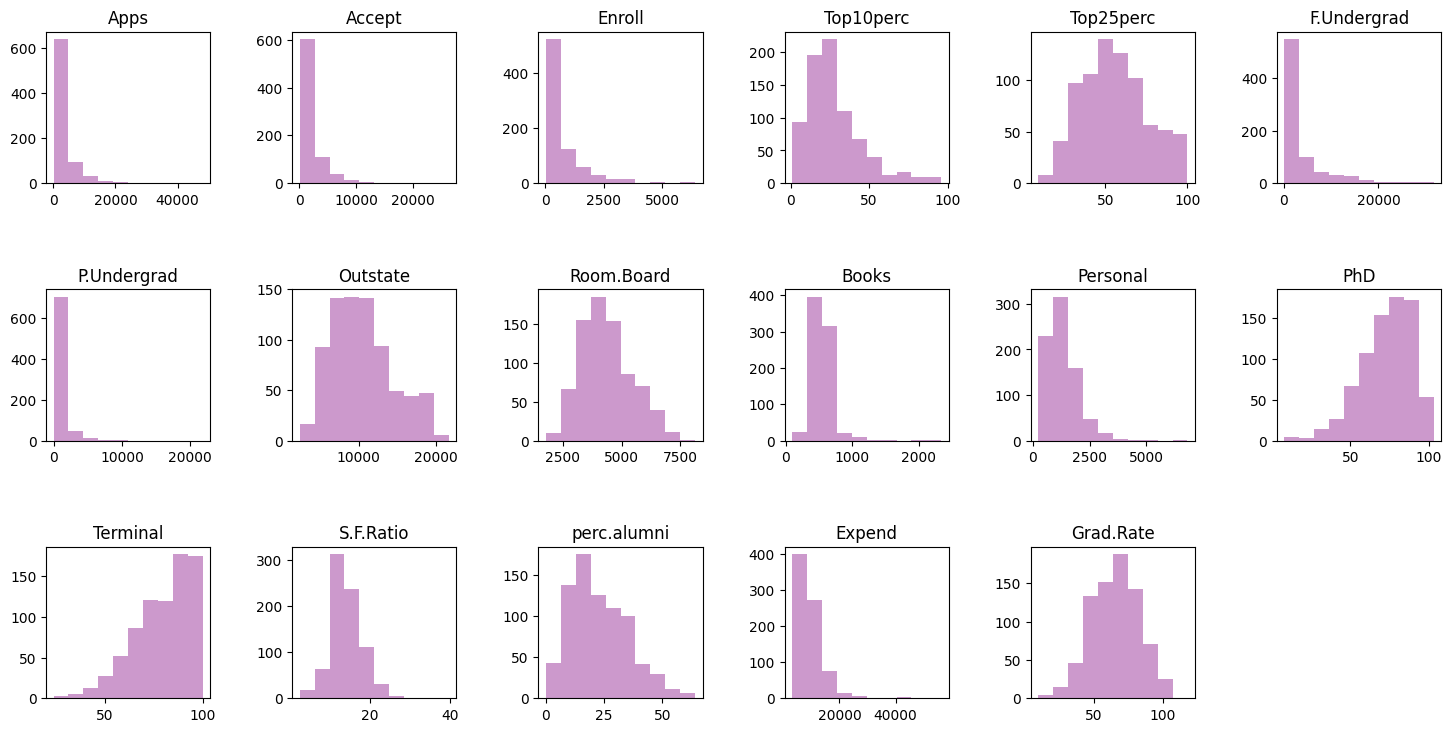

In [41]:
var_ind = range(2, 19)
plot = plt.figure(figsize = (18, 12))
plot.subplots_adjust(hspace = 0.7, wspace = 0.5)
for i in range(1, 18):
    plt.subplot(4, 6, i)
    plt.hist(x = df.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'purple')
    plt.title(df.columns[var_ind[i - 1]])

In [48]:
# Making two new features
df['Acc_rate'] = df['Accept'] / df['Apps']
df['Acc_offer'] = df['Enroll'] / df['Accept']

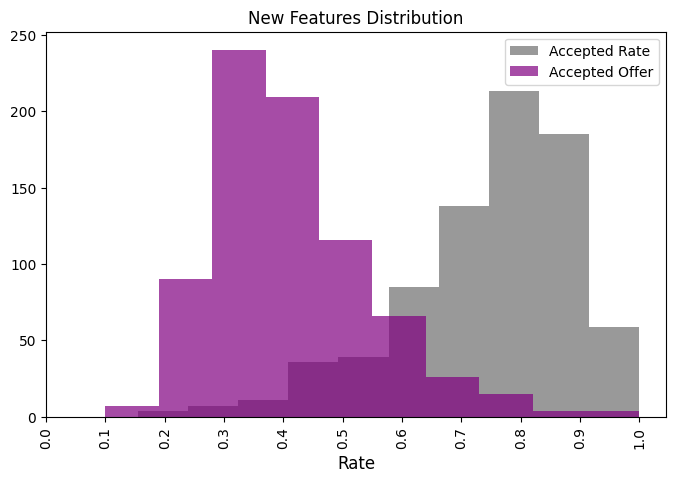

In [89]:
plt.figure(figsize = (8, 5))
plt.title('New Features Distribution', fontsize = 12)
plt.hist(df['Acc_rate'], label = 'Accepted Rate', color = 'black', alpha = 0.4)
plt.hist(df['Acc_offer'], label = 'Accepted Offer', color = 'purple', alpha = 0.7)
plt.xticks(ticks = np.arange(0, 1.1, 0.1), 
           labels = np.round(np.arange(0, 1.1, 0.1), 2),
           rotation = 90)
plt.xlabel('Rate', fontsize = 12)
plt.legend()
plt.show()

In [84]:
#Summary statistics of numeric variables
df.iloc[: , 1:].describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Acc_rate,Acc_offer
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777.000000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332,0.746928,0.412015
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771,0.147104,0.133989
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000,0.154486,0.099754
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000,0.675647,0.317204
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000,0.778750,0.387419
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000,0.848522,0.485674
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000,1.000000,1.000000


In [101]:
# Doesn't make sence!
df[df['Grad.Rate'] > 100]

,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Acc_rate,Acc_offer
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,...,600,500,22,47,14.3,20,7697,118,0.892384,0.15351


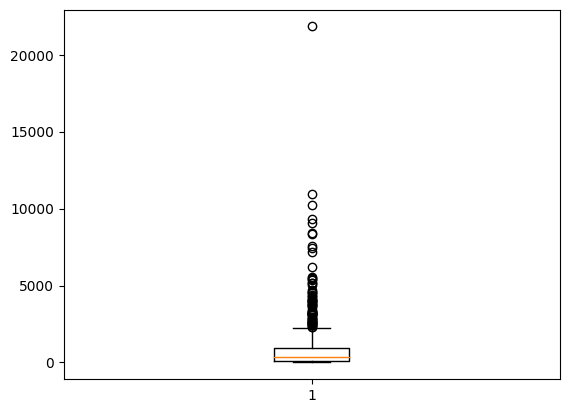

In [102]:
#Check for outliers
plt.boxplot(df['P.Undergrad'])
plt.show()

In [104]:
df[df['P.Undergrad'] > 10000]

,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Acc_rate,Acc_offer
418,Northeastern University,Yes,11901,8492,2517,16,42,11160,10221,13380,...,600,1750,73,82,12.9,17,9563,46,0.713553,0.296397
640,University of Minnesota Twin Cities,No,11054,6397,3524,26,55,16502,21836,8949,...,714,2910,88,90,12.2,37,16122,45,0.578705,0.550883
676,University of South Florida,No,7589,4676,1876,29,63,14770,10962,6760,...,500,2180,84,89,17.0,7,11020,47,0.616155,0.401198


#### 5: Bivariate data analysis

In [106]:
#Pearson Correlation analysis
corr_table = round(df.iloc[:, 2:].corr(method = 'pearson'), 2)
corr_table

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Acc_rate,Acc_offer
Apps,1.00,0.94,0.85,0.34,0.35,0.81,0.40,0.05,0.16,0.13,0.18,0.39,0.37,0.10,-0.09,0.26,0.15,-0.39,-0.14
Accept,0.94,1.00,0.91,0.19,0.25,0.87,0.44,-0.03,0.09,0.11,0.20,0.36,0.34,0.18,-0.16,0.12,0.07,-0.18,-0.16
Enroll,0.85,0.91,1.00,0.18,0.23,0.96,0.51,-0.16,-0.04,0.11,0.28,0.33,0.31,0.24,-0.18,0.06,-0.02,-0.15,0.10
Top10perc,0.34,0.19,0.18,1.00,0.89,0.14,-0.11,0.56,0.37,0.12,-0.09,0.53,0.49,-0.38,0.46,0.66,0.49,-0.48,-0.13
Top25perc,0.35,0.25,0.23,0.89,1.00,0.20,-0.05,0.49,0.33,0.12,-0.08,0.55,0.52,-0.29,0.42,0.53,0.48,-0.43,-0.16
F.Undergrad,0.81,0.87,0.96,0.14,0.20,1.00,0.57,-0.22,-0.07,0.12,0.32,0.32,0.30,0.28,-0.23,0.02,-0.08,-0.16,0.10
P.Undergrad,0.40,0.44,0.51,-0.11,-0.05,0.57,1.00,-0.25,-0.06,0.08,0.32,0.15,0.14,0.23,-0.28,-0.08,-0.26,-0.09,0.14
Outstate,0.05,-0.03,-0.16,0.56,0.49,-0.22,-0.25,1.00,0.65,0.04,-0.30,0.38,0.41,-0.55,0.57,0.67,0.57,-0.24,-0.46
Room.Board,0.16,0.09,-0.04,0.37,0.33,-0.07,-0.06,0.65,1.00,0.13,-0.20,0.33,0.37,-0.36,0.27,0.50,0.42,-0.31,-0.43
Books,0.13,0.11,0.11,0.12,0.12,0.12,0.08,0.04,0.13,1.00,0.18,0.03,0.10,-0.03,-0.04,0.11,0.00,-0.17,0.03


In [143]:
df[df['Apps'] > 40000]
# At this point I'll drop Rutgers at New Brunswick because it has 40000 Apps
df.drop(index = 483, inplace = True)

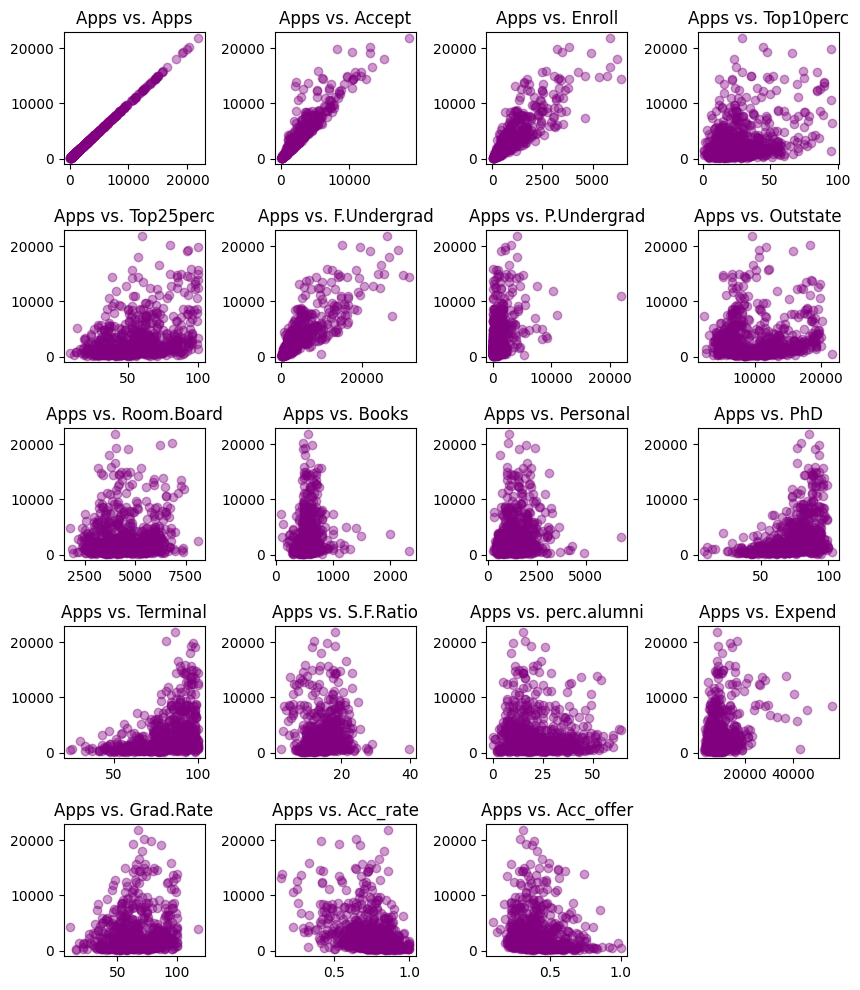

In [144]:
#Scatter plot
var_ind = list(range(2, 21))
plt.figure(figsize = (10, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 20):
    plt.subplot(5, 4, i)
    plt.scatter(x = df.iloc[: , var_ind[i - 1]], 
                y = df['Apps'], 
                alpha = 0.4, color = 'purple')
    plt.title('Apps vs. ' + df.columns[var_ind[i - 1]])

## Data Preparation 

In [150]:
#Remove players' name
df.drop(columns = 'College.Name', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, 0 to 776
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      776 non-null    object 
 1   Apps         776 non-null    int64  
 2   Accept       776 non-null    int64  
 3   Enroll       776 non-null    int64  
 4   Top10perc    776 non-null    int64  
 5   Top25perc    776 non-null    int64  
 6   F.Undergrad  776 non-null    int64  
 7   P.Undergrad  776 non-null    int64  
 8   Outstate     776 non-null    int64  
 9   Room.Board   776 non-null    int64  
 10  Books        776 non-null    int64  
 11  Personal     776 non-null    int64  
 12  PhD          776 non-null    int64  
 13  Terminal     776 non-null    int64  
 14  S.F.Ratio    776 non-null    float64
 15  perc.alumni  776 non-null    int64  
 16  Expend       776 non-null    int64  
 17  Grad.Rate    776 non-null    int64  
 18  Acc_rate     776 non-null    float64
 19  Acc_offer    

In [154]:
dummy_var = pd.get_dummies(df['Private'])
dummy_var.drop(columns = 'No', inplace = True)
dummy_var

,Yes
0,True
1,True
2,True
3,True
4,True
...,...
772,False
773,True
774,True
775,True


In [176]:
df['Private'] = dummy_var
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Acc_rate,Acc_offer
0,True,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.742169,0.585227
1,True,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.880146,0.266112
2,True,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.768207,0.306290
3,True,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0.836930,0.392550
4,True,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0.756477,0.376712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,False,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0.689577,0.358416
773,True,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,0.921388,0.385042
774,True,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,0.913209,0.362924
775,True,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,0.229145,0.536894


In [159]:
#Split data into test and train
train, test = train_test_split(df, train_size = 0.7, random_state = 1234)
print(train.shape)
print(test.shape)

(543, 20)
(233, 20)


In [178]:
X_train = train.drop(columns = 'Apps')
y_train = train['Apps']
X_test = test.drop(columns = 'Apps')
y_test = test['Apps']
print(X_train.shape)
print(X_test.shape)

(543, 19)
(233, 19)


### Linear Regression

In [179]:
#Linear regression - model 1
from sklearn.linear_model import LinearRegression
#Create linear regression model
model_1 = LinearRegression()
#Fit the linear regressor on the train
model_1.fit(X_train, y_train)
#Linear regression coefficients
print(model_1.coef_)
print(model_1.intercept_)

[-1.67686810e+02  1.37090324e+00  4.04876361e-02  2.59388774e+01
 -1.03011841e+01 -1.50088546e-02 -6.53480239e-03 -3.98332096e-02
  4.36431681e-02 -3.30079186e-01 -6.62778553e-03 -6.09936209e+00
 -2.01339541e+00 -8.85172551e+00 -7.43053682e-01  3.95341014e-02
  3.36857965e+00 -5.16290220e+03  6.03594517e+02]
4389.144761697117


In [180]:
#### Predict the response in the train
y_train_pred_1 = model_1.predict(X_train)

#Calculare residuals
res_1 = y_train - y_train_pred_1

#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_1)))
#The root mean squared error
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_1) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_1)))

RMSE: 743.891
MAPE: 39.664
R2: 0.956


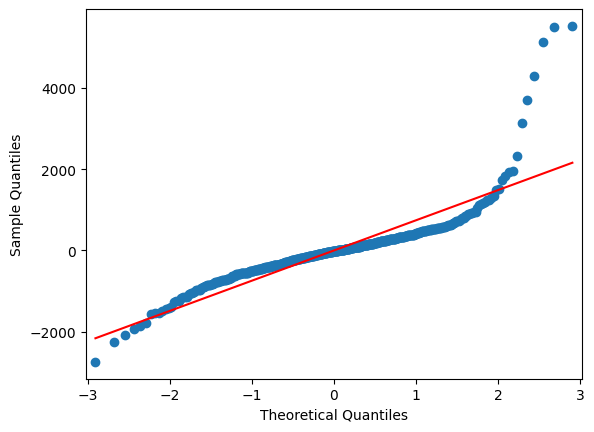

In [181]:
import statsmodels.api as sm
#QQ-plot - model 1
sm.qqplot(res_1, line = 's')
plt.show()

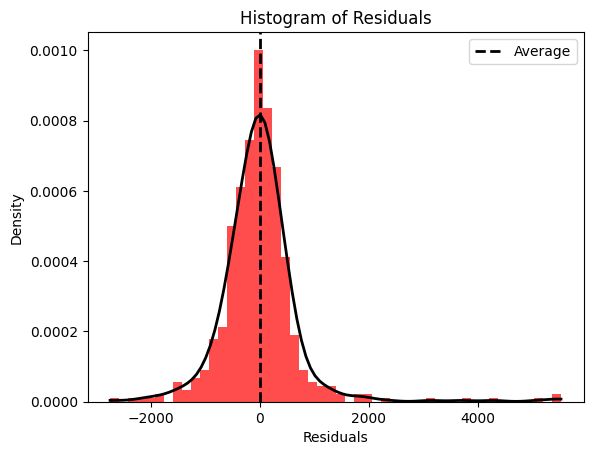

In [188]:
hist_residuals(res_1)

In [191]:
y_test_pred_1 = model_1.predict(X_test)

#Absolute error
abs_err_1 = abs(y_test - y_test_pred_1)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.DataFrame({'RMSE': root_mean_squared_error(y_test, y_test_pred_1),
                            'MAPE': mean_absolute_percentage_error(y_test, y_test_pred_1) * 100,
                            'MAE' : abs_err_1.mean(),
                            'Median of AbsErrors' : abs_err_1.median(),
                            'SD of AbsErrors' :     abs_err_1.std(),
                            'IQR of AbsErrors':     iqr(abs_err_1),
                            'Min of AbsErrors':     abs_err_1.min(),
                            'Max of AbsErrors':     abs_err_1.max()}, 
                            index = ['LR - All Features'])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LR - All Features,825.887321,39.261762,491.538524,304.811887,665.115302,433.924453,3.748909,5333.132309


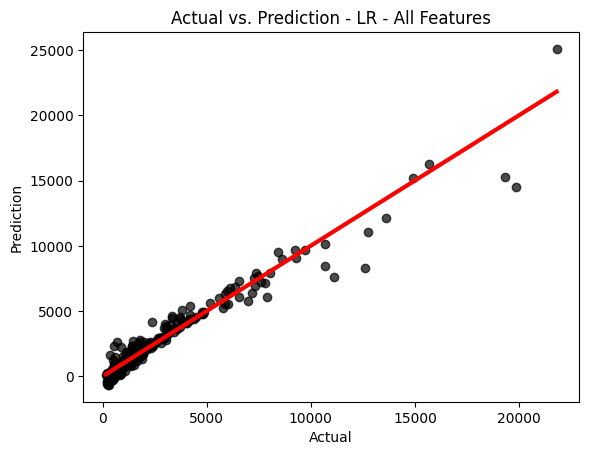

In [192]:
#Plot actual vs. prediction - Test
plt.scatter(y_test, y_test_pred_1, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - LR - All Features')
#Add 45 degree line
xp = np.linspace(y_test.min() - 0.2, y_test.max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

In [211]:
#Box-Cox transformation
from sklearn.preprocessing import PowerTransformer
boxcox = PowerTransformer(method = 'box-cox')
boxcox.fit(y_train.values.reshape(-1, 1))
boxcox.lambdas_

array([-0.06024836])

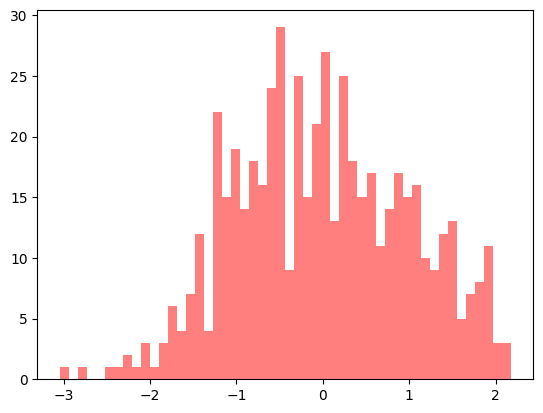

In [212]:
trans_y_train = boxcox.fit_transform(y_train.values.reshape(-1, 1))
plt.hist(trans_y_train, color = 'red', alpha = 0.5, bins = 50)
plt.show()

In [213]:
#Linear regression w/ Box-Cox transformation - model 2
from sklearn.linear_model import LinearRegression
#Create linear regression model
model_2 = LinearRegression()
#Fit the linear regressor on the train
model_2.fit(X_train, trans_y_train)
#Linear regression coefficients
print(model_2.coef_)
print(model_2.intercept_)

[[-4.42133511e-01  1.06349557e-04  5.61231175e-04  3.72916793e-03
  -2.12395436e-04 -5.37576177e-05  3.12030590e-05  2.34845442e-05
  -4.69044128e-05  3.72067415e-04  5.23666578e-05  3.25756394e-03
   2.35583196e-03  3.65246142e-02 -5.50233620e-03  1.41540014e-05
   4.84717250e-03 -1.52338243e+00 -1.94635918e+00]]
[0.09879493]


In [214]:
#Predict the response in the train
y_train_pred_2 = model_2.predict(X_train)
#Inverse transformation of predicted values
y_train_pred_2 = pd.Series(boxcox.inverse_transform(y_train_pred_2.reshape(-1, 1)).reshape(-1))

compute_metrics(y_train, y_train_pred_2)
y_train_pred_2

RMSE: 8588.635
MAPE: 39.338
R2: -4.921


0      2487.030467
1       962.593439
2      1529.107374
3       740.621386
4       591.631992
          ...     
538     801.481137
539     559.987326
540     915.621748
541    1260.857019
542    1302.504537
Length: 543, dtype: float64

ValueError: x and y must be the same size

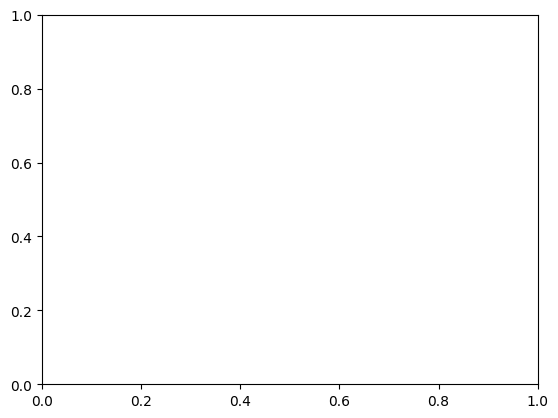

In [216]:
#Plot actual vs. prediction - Test
plt.scatter(y_train, y_test_pred_1, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - LM - All Features - Box Cox')
#Add 45 degree line
xp = np.linspace(y_train.min() - 0.2, y_train.max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()